##ตัวอย่าง Exploration on text data 




ติดตั้ง Library สำหรับจัดการข้อมูลประเภทข้อความภาษาไทย

In [40]:
#  # install library for Thai NLP
# !pip install pandas matplotlib pythainlp

In [41]:
import re
import string
from pythainlp import word_tokenize
from pythainlp.corpus.common import thai_stopwords

**ขอสิทธิ์การเข้าใช้งาน Colab Notebook ซึ่งเก็บฟอนต์ภาษาไทยที่ใช้แสดงผลไว้**

In [42]:
# from google.colab import drive 

# drive.mount('/content/gdrive')

import os
os.chdir("/Users/phutharesuanwachirapisut/Programming/Python/204102")

อ่านข้อมูลจากไฟล์ตัวอย่างที่เก็บไว้ใน Github

In [43]:
import pandas as pd

data = pd.read_csv('https://github.com/PyThaiNLP/thai-sentiment-analysis-dataset/raw/master/review_shopping.csv',sep='\t', names=['text', 'sentiment'], header=None )
data.columns=['review','sentiment']
print(data)

                                                review sentiment
0      เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า       neg
1                                     สินค้าด้อยคุณภาพ       neg
2    สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...       neg
3                  อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ       neg
4    คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...       neg
..                                                 ...       ...
123  สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...       neg
124     เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก       neg
125     ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ       neg
126  สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...       neg
127                     รายการไม่ดี ที่จับไม่ดีและสั้น       neg

[128 rows x 2 columns]


**ทดสอบให้พิมพ์ stopword ภาษาไทย

In [44]:
thai_stopwords = list(thai_stopwords())
thai_stopwords

['เกี่ยวๆ',
 'แต่ละ',
 'จัดตั้ง',
 'ไง',
 'หมด',
 'ทุกคน',
 'ประการ',
 'ข้างล่าง',
 'ส่วนนั้น',
 'ที่นั้น',
 'นัก',
 'ล้วนจน',
 'แต่ว่า',
 'คราวนั้น',
 'ฝ่ายใด',
 'เต็มไปด้วย',
 'เพียง',
 'เช่นดังเก่า',
 'ก็ตามที',
 'ถ้าหาก',
 'แต่จะ',
 'คล้ายกัน',
 'เห็นควร',
 'ทุก',
 'เสร็จกัน',
 'ตลอดทั้ง',
 'ซะจนกระทั่ง',
 'ใหม่ๆ',
 'ก่อนหน้านี้',
 'ที่ๆ',
 'ใน',
 'เช่นเคย',
 'พึ่ง',
 'ซะก่อน',
 'แม้',
 'ใคร่จะ',
 'ทุกคราว',
 'จนกว่า',
 'ฯ',
 'ผิด',
 'มอง',
 'นอกจากที่',
 'ถึงเมื่อ',
 'ควร',
 'บอกแล้ว',
 'เพียงพอ',
 'เพราะฉะนั้น',
 'อาจจะ',
 'ทุกครา',
 'ช่วงหน้า',
 'ยังจะ',
 'เพียงไร',
 'พอ',
 'หนอ',
 'แห่งใด',
 'มากกว่า',
 'เข้าใจ',
 'ทันทีทันใด',
 'พอแล้ว',
 'พวกเธอ',
 'เมื่อไหร่',
 'คำ',
 'สมัยโน้น',
 'หลาย',
 'ดั่งเก่า',
 'มัก',
 'ทุกทาง',
 'ช่วงระหว่าง',
 'อย่างเช่น',
 'พร้อมที่',
 'นับ',
 'เช่นนี้',
 'ทีเถอะ',
 'ที่จริง',
 'กันดีกว่า',
 'นับตั้งแต่',
 'คราวที่',
 'เป็นแต่เพียง',
 'เหตุผล',
 'เท่ากัน',
 'กู',
 'ทรง',
 'บางคราว',
 'ตนเอง',
 'รวมด้วย',
 'เมื่อไร',
 'พร้อมด้วย',
 'หรือเปล่า',
 'อ

# Data Preprocessing  สร้างเป็นฟังก์ชันเพื่อเรียกใช้ซ้ำ

In [45]:

    # กำจัด URL
data['review'] = data['review'].apply(lambda x: " ".join(re.sub(r"https?://[A-Za-z0-9./]+", '', w ) for w in x.split()))

       # กำจัด stop words
data['review'] = data['review'].apply(lambda x: " ".join(w for w in word_tokenize(x) if w not in thai_stopwords))

    # ตัดเครื่องหมายวรรคตอน ... remove punctuation
data['review'] = data['review'].apply(lambda x: " ".join([w for w in x.split() if w not in list(string.punctuation)]))

    # กำจัดตัวเลข
data['review'] = data['review'].apply(lambda x: " ".join(re.sub(r"[0-9.]+%", '', w ) for w in x.split()) )

    # กำจัดข้อความภาษาอังกฤษ
data['review'] = data['review'].apply(lambda x: " ".join(re.sub(r"[A-Za-z]+", '', w ) for w in x.split()) )

# แสดงผลข้อมูลหลังจาก Data Preprocessing
print(data['review'] )


0                 เกลียด ชอบ หลอก สั่งซื้อ ที่ไหนได้ ค้า
1                                     สินค้า ด้อย คุณภาพ
2                  สินค้า แจ้ง อะ กด ใส่ ตะกร้า เซ็ง เรย
3                                  อย่า ทำ แบบนี้ แย่มาก
4      เเบบ ผิดหวัง เเย่ ฝา เ เตก เ เตก เ เตก จบ เ เย...
                             ...                        
123          สินค้า มีตำหนิ แย่มาก ไหว มีตำหนิ ทำใจ ซื้อ
124                          เปราะบาง ความแข็งแรง แตกหัก
125          ขนส่ง สินค้า มีตำหนิ แพ็ค สินค้า ดี รอย บุบ
126    สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10...
127                                  รายการ ดี ที่จับ ดี
Name: review, Length: 128, dtype: object


สร้าง Word Cloud สำหรับ Positive และ Negative รีวิว

In [46]:
# !pip install wordcloud

In [47]:
from wordcloud import WordCloud
import nltk
import matplotlib.pyplot as plt
fp = 'THSarabunNew.ttf' # font

Word Cloud สำหรับข้อความรีวิว

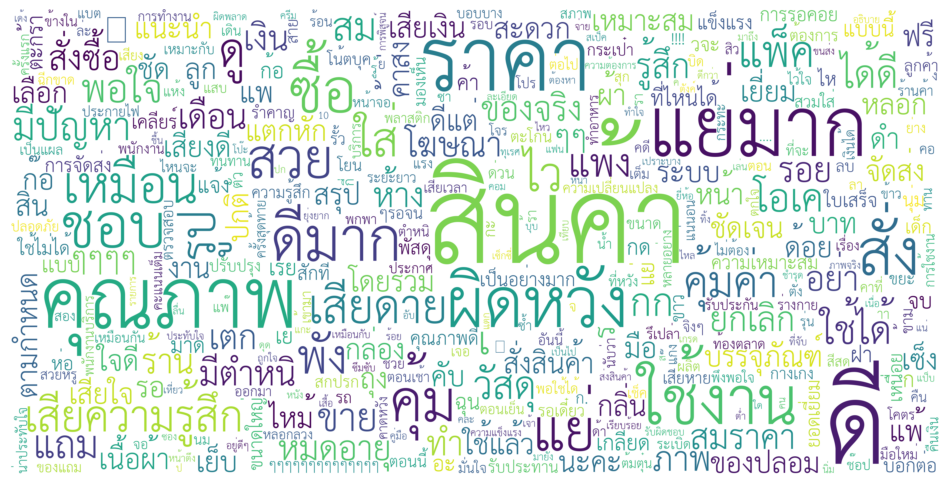

In [48]:
frequency_dist = [ ]
for message in data['review']:
       words = word_tokenize(message)
       for w in words:
              frequency_dist.append(w)
frequency_dist = nltk.FreqDist(frequency_dist)
wcloud = WordCloud( background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp).generate_from_frequencies(frequency_dist)

plt.figure(figsize = (12,8))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud สำหรับ Positive รีวิว

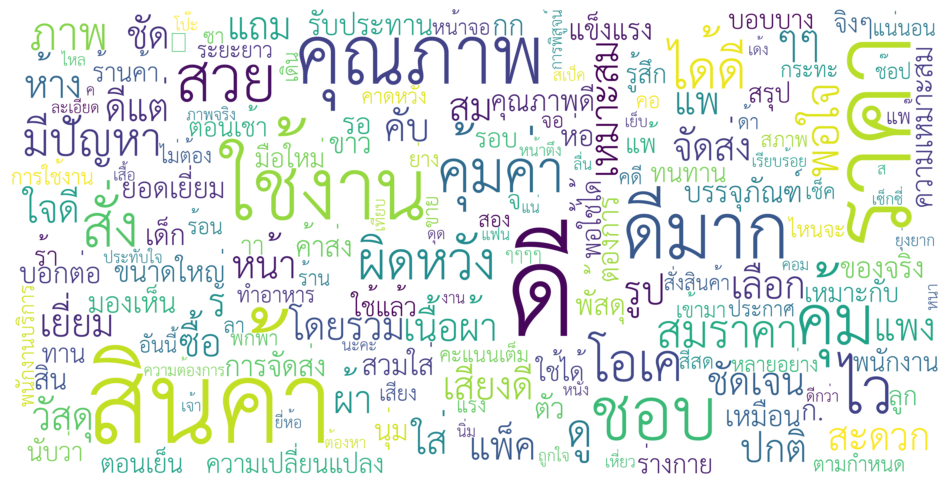

In [49]:
data_positive = data[data['sentiment'] == 'pos']

frequency_positive_dist = [ ]

for message in data_positive['review']:
       words = word_tokenize(message)
       for w in words:
              frequency_positive_dist.append(w)
              
frequency_positive_dist = nltk.FreqDist(frequency_positive_dist)
positive_wcloud = WordCloud( background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp).generate_from_frequencies(frequency_positive_dist)

plt.figure(figsize = (12,8))
plt.imshow(positive_wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud สำหรับ  Negative รีวิว

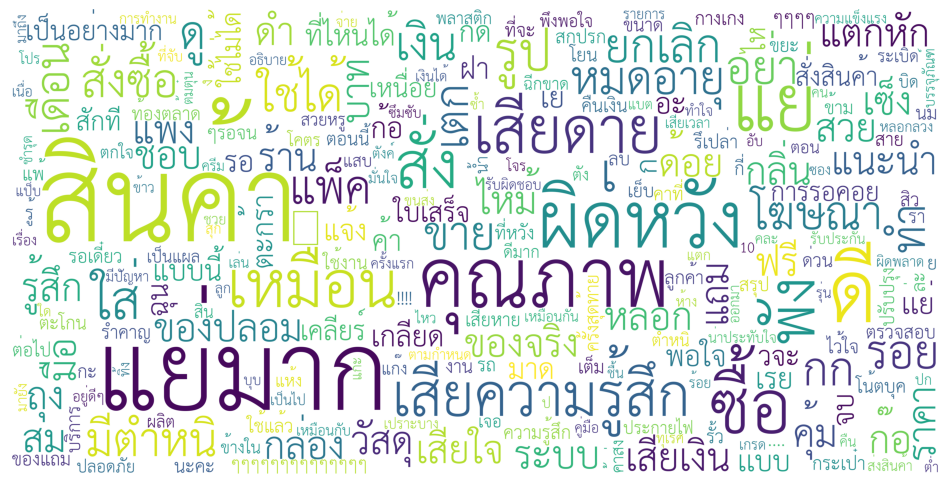

In [50]:
data_negative = data[data['sentiment'] == 'neg']
frequency_negative_dist = [ ]
for message in data_negative['review']:
       words = word_tokenize(message)
       for w in words:
              frequency_negative_dist.append(w)
frequency_negative_dist = nltk.FreqDist(frequency_negative_dist)
negative_wcloud = WordCloud(background_color = 'white', max_words=2000, height = 2000, width=4000,font_path=fp).generate_from_frequencies(frequency_negative_dist)

plt.figure(figsize = (12,8))
plt.imshow(negative_wcloud)
plt.axis('off')
plt.show()